# Multiple Regression - Usage of multiple features to predict the target variable
### Simple Linear Regression -> y = $\beta_0 + \beta_1X$
### Multiple Linear Regression -> y = $\beta_0 + \beta_1X_1 + \beta_2X_2 + \beta_3X_3 + \beta_4X_4.... $

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [81]:
from sklearn.datasets import load_boston #load Boston Housing dataset from Scikit-learn

In [82]:
boston_data = load_boston() #boston_data contains not only matrix values but also description of columns.

In [83]:
df = pd.DataFrame(boston_data.data, columns=boston_data.feature_names) #boston_data.data is better than boston_data

In [84]:
df.head() #use headings. MEDV is missing in below because it is not part of features matrix. It is the target value

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.0063,18.0000,2.3100,0.0000,0.5380,6.5750,65.2000,4.0900,1.0000,296.0000,15.3000,396.9000,4.9800
1,0.0273,0.0000,7.0700,0.0000,0.4690,6.4210,78.9000,4.9671,2.0000,242.0000,17.8000,396.9000,9.1400
2,0.0273,0.0000,7.0700,0.0000,0.4690,7.1850,61.1000,4.9671,2.0000,242.0000,17.8000,392.8300,4.0300
3,0.0324,0.0000,2.1800,0.0000,0.4580,6.9980,45.8000,6.0622,3.0000,222.0000,18.7000,394.6300,2.9400
4,0.0691,0.0000,2.1800,0.0000,0.4580,7.1470,54.2000,6.0622,3.0000,222.0000,18.7000,396.9000,5.3300


In [85]:
X = df 

In [10]:
# col_study = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM']
# X = df[col_study]

In [86]:
y = boston_data.target

# Stats Model

In [87]:
#statsmodels is a Python module that provides classes and functions for the estimation of many different 
#statistical models, as well as for conducting statistical tests, and statistical data exploration
import statsmodels.api as sm
import statsmodels.formula.api as smf;

In [88]:
X_constant = sm.add_constant(X) #we need to add a constant term to allow statsmodel.api to calculate bias/intercepts

In [89]:
pd.DataFrame(X_constant) #constant is added as the first column

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.0000,0.0063,18.0000,2.3100,0.0000,0.5380,6.5750,65.2000,4.0900,1.0000,296.0000,15.3000,396.9000,4.9800
1,1.0000,0.0273,0.0000,7.0700,0.0000,0.4690,6.4210,78.9000,4.9671,2.0000,242.0000,17.8000,396.9000,9.1400
2,1.0000,0.0273,0.0000,7.0700,0.0000,0.4690,7.1850,61.1000,4.9671,2.0000,242.0000,17.8000,392.8300,4.0300
3,1.0000,0.0324,0.0000,2.1800,0.0000,0.4580,6.9980,45.8000,6.0622,3.0000,222.0000,18.7000,394.6300,2.9400
4,1.0000,0.0691,0.0000,2.1800,0.0000,0.4580,7.1470,54.2000,6.0622,3.0000,222.0000,18.7000,396.9000,5.3300
5,1.0000,0.0299,0.0000,2.1800,0.0000,0.4580,6.4300,58.7000,6.0622,3.0000,222.0000,18.7000,394.1200,5.2100
6,1.0000,0.0883,12.5000,7.8700,0.0000,0.5240,6.0120,66.6000,5.5605,5.0000,311.0000,15.2000,395.6000,12.4300
7,1.0000,0.1446,12.5000,7.8700,0.0000,0.5240,6.1720,96.1000,5.9505,5.0000,311.0000,15.2000,396.9000,19.1500
8,1.0000,0.2112,12.5000,7.8700,0.0000,0.5240,5.6310,100.0000,6.0821,5.0000,311.0000,15.2000,386.6300,29.9300
9,1.0000,0.1700,12.5000,7.8700,0.0000,0.5240,6.0040,85.9000,6.5921,5.0000,311.0000,15.2000,386.7100,17.1000


### Ordinary least squares (OLS) or linear least squares is a method for estimating the unknown parameters in a linear regression model. OLS chooses the parameters of a linear function of a set of explanatory variables by minimizing the sum of the squares of the differences between the observed dependent variable (values of the variable being predicted) in the given dataset and those predicted by the linear function (predict - trained)

In [90]:
model = sm.OLS(y,X_constant) #OLS - Ordinary Least Square. Please note here that y and X are interchanged
lr = model.fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 18 Jun 2018   Prob (F-statistic):          6.95e-135
Time:                        21:53:26   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4911      5.104      7.149      0.000      26.462      46.520
CRIM          -0.1072      0.033     -3.276      0.001      -0.171      -0.043
ZN             0.0464      0.014      3.380      0.001       0.019       0.073
INDUS          0.0209      0.061      0.339      0.735      -0.100       0.142
CHAS           2.6886      0.862      3.120      0.002       0.996       4.381
NOX          -17.7958      3.821     -4.658      0.000     -25.302     -10.289
RM             3.8048      0.418      9.102      0.000       2.983       4.626
AGE            0.0008      0.013      0.057      0.955      -0.025       0.027
DIS           -1.4758      0.199     -7.398      0.000      -1.868      -1.084
RAD            0.3057      0.066      4.608      0.000       0.175       0.436
TAX           -0.0123      0.004     -3.278      0.001      -0.020      -0.005
PTRATIO       -0.9535      0.131     -7.287      0.000      -1.211      -0.696
B              0.0094      0.003      3.500      0.001       0.004       0.015
LSTAT         -0.5255      0.051    -10.366      0.000      -0.625      -0.426
==============================================================================
Omnibus:                      178.029   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              782.015
Skew:                           1.521   Prob(JB):                    1.54e-170
Kurtosis:                       8.276   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Another approach - Provide formula for the API statsmodels.formula.api

In [91]:
form_lr = smf.ols(formula = 'y ~ CRIM+ZN+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+TAX+PTRATIO+B+LSTAT', data=df)
mlr = form_lr.fit()

In [92]:
mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 18 Jun 2018   Prob (F-statistic):          6.95e-135
Time:                        21:53:33   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4911      5.104      7.149      0.000      26.462      46.520
CRIM          -0.1072      0.033     -3.276      0.001      -0.171      -0.043
ZN             0.0464      0.014      3.380      0.001       0.019       0.073
INDUS          0.0209      0.061      0.339      0.735      -0.100       0.142
CHAS           2.6886      0.862      3.120      0.002       0.996       4.381
NOX          -17.7958      3.821     -4.658      0.000     -25.302     -10.289
RM             3.8048      0.418      9.102      0.000       2.983       4.626
AGE            0.0008      0.013      0.057      0.955      -0.025       0.027
DIS           -1.4758      0.199     -7.398      0.000      -1.868      -1.084
RAD            0.3057      0.066      4.608      0.000       0.175       0.436
TAX           -0.0123      0.004     -3.278      0.001      -0.020      -0.005
PTRATIO       -0.9535      0.131     -7.287      0.000      -1.211      -0.696
B              0.0094      0.003      3.500      0.001       0.004       0.015
LSTAT         -0.5255      0.051    -10.366      0.000      -0.625      -0.426
==============================================================================
Omnibus:                      178.029   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              782.015
Skew:                           1.521   Prob(JB):                    1.54e-170
Kurtosis:                       8.276   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Correlation Matrix

Correlation most often refers to how close two variables are to having a linear relationship with each other

In [93]:
# Correlation is measure of how scattered the data points are. Are they closer or farther
# Large correlation means more spread on y-axis than x-axis (less residue)
# Smaller correlation means more spread on x-axis than y-axis (more residue)
pd.options.display.float_format = '{:,.4f}'.format #only 4 decimals
corr_matrix = df.corr() #Get the correlation
corr_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.0000,-0.1995,0.4045,-0.0553,0.4175,-0.2199,0.3508,-0.3779,0.6220,0.5796,0.2883,-0.3774,0.4522
ZN,-0.1995,1.0000,-0.5338,-0.0427,-0.5166,0.3120,-0.5695,0.6644,-0.3119,-0.3146,-0.3917,0.1755,-0.4130
INDUS,0.4045,-0.5338,1.0000,0.0629,0.7637,-0.3917,0.6448,-0.7080,0.5951,0.7208,0.3832,-0.3570,0.6038
CHAS,-0.0553,-0.0427,0.0629,1.0000,0.0912,0.0913,0.0865,-0.0992,-0.0074,-0.0356,-0.1215,0.0488,-0.0539
NOX,0.4175,-0.5166,0.7637,0.0912,1.0000,-0.3022,0.7315,-0.7692,0.6114,0.6680,0.1889,-0.3801,0.5909
RM,-0.2199,0.3120,-0.3917,0.0913,-0.3022,1.0000,-0.2403,0.2052,-0.2098,-0.2920,-0.3555,0.1281,-0.6138
AGE,0.3508,-0.5695,0.6448,0.0865,0.7315,-0.2403,1.0000,-0.7479,0.4560,0.5065,0.2615,-0.2735,0.6023
DIS,-0.3779,0.6644,-0.7080,-0.0992,-0.7692,0.2052,-0.7479,1.0000,-0.4946,-0.5344,-0.2325,0.2915,-0.4970
RAD,0.6220,-0.3119,0.5951,-0.0074,0.6114,-0.2098,0.4560,-0.4946,1.0000,0.9102,0.4647,-0.4444,0.4887
TAX,0.5796,-0.3146,0.7208,-0.0356,0.6680,-0.2920,0.5065,-0.5344,0.9102,1.0000,0.4609,-0.4418,0.5440


In [94]:
corr_matrix[np.abs(corr_matrix) < 0.6] = 0 #ignore all correlation matrices less than 0.6. Note abs. Hence -ve values
corr_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.6220,0.0000,0.0000,0.0000,0.0000
ZN,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.6644,0.0000,0.0000,0.0000,0.0000,0.0000
INDUS,0.0000,0.0000,1.0000,0.0000,0.7637,0.0000,0.6448,-0.7080,0.0000,0.7208,0.0000,0.0000,0.6038
CHAS,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
NOX,0.0000,0.0000,0.7637,0.0000,1.0000,0.0000,0.7315,-0.7692,0.6114,0.6680,0.0000,0.0000,0.0000
RM,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.6138
AGE,0.0000,0.0000,0.6448,0.0000,0.7315,0.0000,1.0000,-0.7479,0.0000,0.0000,0.0000,0.0000,0.6023
DIS,0.0000,0.6644,-0.7080,0.0000,-0.7692,0.0000,-0.7479,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000
RAD,0.6220,0.0000,0.0000,0.0000,0.6114,0.0000,0.0000,0.0000,1.0000,0.9102,0.0000,0.0000,0.0000
TAX,0.0000,0.0000,0.7208,0.0000,0.6680,0.0000,0.0000,0.0000,0.9102,1.0000,0.0000,0.0000,0.0000


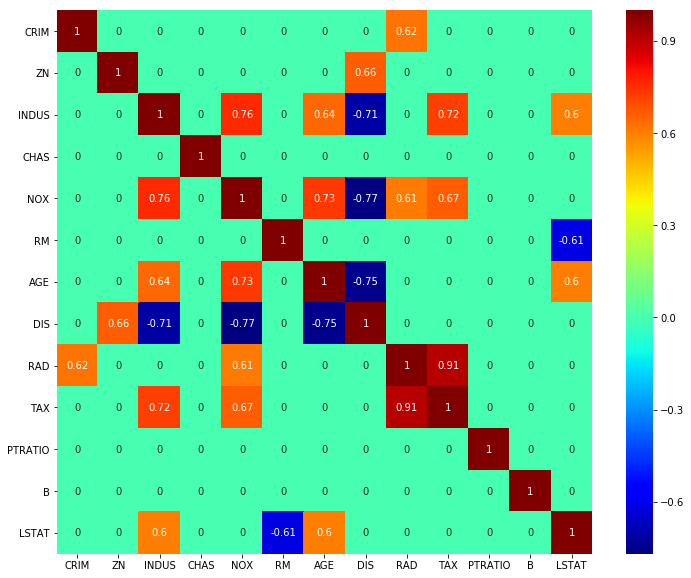

In [95]:
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap=plt.get_cmap('jet')) #Heatmap from Seaborn
plt.show()

# Detecting Colinearity with Eigen Vectors
### Eigen Vector and Eigen Values => There exists a eigen vector $\bar{X}$ such that A$\bar{X} = \lambda\bar{X}$ where $\lambda$ is the Eigen Value

Eigen Vectors are 1 of the 3 standard methods for detecting colinearity between features. Multi-Colinearity is a problem because when 2 features are related, we will not know if a increase in 1 affected the final output or an increase in the other feature. Eigen Vectors help re-arrange the features from matrix to a vector. 

In [96]:
eigenvalues, eigenvectors = np.linalg.eig(df.corr()) #Use numpy's linear algebra

In [97]:
pd.Series(eigenvalues).sort_values() #pd.Series method returns a 1 dimension ndarray.The sort_values method is for sort

8    0.0635
10   0.1692
11   0.1862
12   0.2203
9    0.2774
7    0.3965
6    0.5390
5    0.6597
4    0.8346
3    0.8578
2    1.2412
1    1.4321
0    6.1227
dtype: float64

#### Note that index 8, eigenvalue is 0.0635 which is close to 0 or small compared to others. Small value represents presence of collinearity

In [110]:
np.abs(pd.Series(eigenvectors[:,8])).sort_values(ascending=False) #Take the eigenvector(2D matrix) corresponding to lowest eigenvalue of 0.0635

9    0.7202
8    0.6334
2    0.2513
1    0.0809
5    0.0458
0    0.0455
4    0.0439
6    0.0387
3    0.0359
12   0.0248
10   0.0235
7    0.0183
11   0.0049
dtype: float64

In [21]:
print(df.columns[2], df.columns[8], df.columns[9]) #Column 9 (INDUS) has high collinearity with RAD

INDUS RAD TAX


## Revisiting Feature Importance and Extractions

#### Check
-  Direction of the coefficient
-  Impact of the variable/factor on the model

In [22]:
df.head()
np.corrcoef(df.TAX, df.NOX) #correlation coefficient. coefficient has values between -1 and 1. closer to 1 is strong correlation

array([[ 1.       ,  0.6680232],
       [ 0.6680232,  1.       ]])

In [23]:
df.corr() #correlation

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.0000,-0.1995,0.4045,-0.0553,0.4175,-0.2199,0.3508,-0.3779,0.6220,0.5796,0.2883,-0.3774,0.4522
ZN,-0.1995,1.0000,-0.5338,-0.0427,-0.5166,0.3120,-0.5695,0.6644,-0.3119,-0.3146,-0.3917,0.1755,-0.4130
INDUS,0.4045,-0.5338,1.0000,0.0629,0.7637,-0.3917,0.6448,-0.7080,0.5951,0.7208,0.3832,-0.3570,0.6038
CHAS,-0.0553,-0.0427,0.0629,1.0000,0.0912,0.0913,0.0865,-0.0992,-0.0074,-0.0356,-0.1215,0.0488,-0.0539
NOX,0.4175,-0.5166,0.7637,0.0912,1.0000,-0.3022,0.7315,-0.7692,0.6114,0.6680,0.1889,-0.3801,0.5909
RM,-0.2199,0.3120,-0.3917,0.0913,-0.3022,1.0000,-0.2403,0.2052,-0.2098,-0.2920,-0.3555,0.1281,-0.6138
AGE,0.3508,-0.5695,0.6448,0.0865,0.7315,-0.2403,1.0000,-0.7479,0.4560,0.5065,0.2615,-0.2735,0.6023
DIS,-0.3779,0.6644,-0.7080,-0.0992,-0.7692,0.2052,-0.7479,1.0000,-0.4946,-0.5344,-0.2325,0.2915,-0.4970
RAD,0.6220,-0.3119,0.5951,-0.0074,0.6114,-0.2098,0.4560,-0.4946,1.0000,0.9102,0.4647,-0.4444,0.4887
TAX,0.5796,-0.3146,0.7208,-0.0356,0.6680,-0.2920,0.5065,-0.5344,0.9102,1.0000,0.4609,-0.4418,0.5440


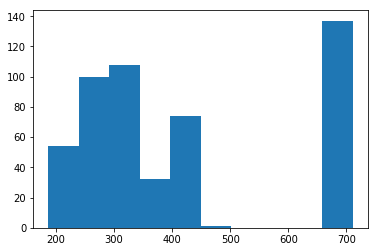

In [24]:
plt.hist(df['TAX']); #histogram

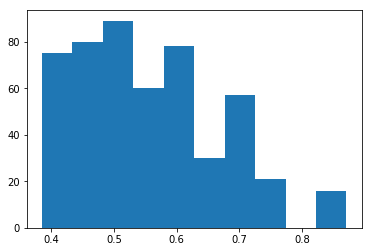

In [25]:
plt.hist(df['NOX']);

## Standardize Variable to identify Key Feature(s)

#### The coefficient of variation (CV) is defined as the ratio of the standard deviation sigma to the mean
A data set of [100, 100, 100] has constant values. Its standard deviation is 0 and average is 100, giving the coefficient of variation as 0 / 100 = 0

A data set of [90, 100, 110] has more variability. Its standard deviation is 10 and its average is 100, giving the coefficient of variation as 10 / 100 = 0.1

A data set of [1, 5, 6, 8, 10, 40, 65, 88] has still more variability. Its standard deviation is 32.904 and its average is 27.875, giving a coefficient of variation of 32.904 / 27.875 = 1.180

In [124]:
from sklearn.linear_model import LinearRegression

In [125]:
model = LinearRegression()

In [126]:
model.fit(X,y);

In [127]:
result = pd.DataFrame(list(zip(model.coef_, df.columns)), columns=['coefficient', 'name']).set_index('name')
np.abs(result).sort_values(by = 'coefficient', ascending=False)

,coefficient
name,
NOX,17.7958
RM,3.8048
CHAS,2.6886
DIS,1.4758
PTRATIO,0.9535
LSTAT,0.5255
RAD,0.3057
CRIM,0.1072
ZN,0.0464


#### Standardization tries to make the mean of the distribution 0 and standard deviation uniform. This way features that vary largely (ex: TAX) do not drown features that vary less (ex: NOX) 

##### Using StandardScaler and then running the Linear Regression model and sorting by coefficient helps identify coefficients that are significant

In [128]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
scaler = StandardScaler()
Stand_coefficient_linear_reg = make_pipeline(scaler, model) #make_pipeline is for combining 2 functions and yield 1 output

In [129]:
Stand_coefficient_linear_reg.steps

[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)),
 ('linearregression',
  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))]

In [48]:
Stand_coefficient_linear_reg.fit(X,y) 
# Get the coefficient from the 2nd function (index 1) of Stand_coefficient_linear_reg variable 
result = pd.DataFrame(list(zip(Stand_coefficient_linear_reg.steps[1][1].coef_, df.columns)), columns=['coefficient', 'name']).set_index('name')
np.abs(result).sort_values(by = 'coefficient', ascending=False)

,coefficient
name,
LSTAT,3.7487
DIS,3.1044
RM,2.6706
RAD,2.6588
TAX,2.0759
PTRATIO,2.0622
NOX,2.0601
ZN,1.0810
CRIM,0.9204


## Use Coefficient of Determination, $R^2$ to identify key features

-  Compare $R^2$ of a model with the feature against $R^2$ of the model without the feature
-  A significant change in $R^2$ signifies the importance of the feature


In [49]:
from sklearn.metrics import r2_score

In [51]:
linear_reg = smf.ols(formula = 'y ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT', data=df)
benchmark = linear_reg.fit()
r2_score(y, benchmark.predict(df))

0.74060774286494269

Without LSTAT

In [52]:
linear_reg = smf.ols(formula = 'y ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B', data=df)
lr_without_LSTAT = linear_reg.fit()
r2_score(y,lr_without_LSTAT.predict(df))

0.6839521119105445

Without AGE

In [50]:
linear_reg = smf.ols(formula = 'y ~ CRIM + ZN + INDUS + CHAS + NOX + RM + DIS + RAD + TAX + PTRATIO + B + LSTAT', data=df)
lr_without_AGE = linear_reg.fit()
r2_score(y,lr_without_AGE.predict(df))

0.74060603879043385

#### We can see from above that taking out LSTAT decreases $R^2$ significantly while taking out AGE does not decrease $R^2$ that much